In [1]:
import pandas as pd
from script import DataManager

dm = DataManager()

#### We now have access to several DataFrames - after running the cell above:

- `dm.train_df`  
    all *train-*.csv* files concatenated into 1 **DataFrame**
- `dm.writing_df`  
    the *writing.json* file parsed into a **DataFrame**
- `dm.directing_df`  
    the *directing.json* file parsed into a **DataFrame**
- `dm.joined_df`   
    result of `writing_df` left-joined with `directing_df` on column *movie*)
- `df.validation_df`  
    the *validation_hidden.csv* file as a **DataFrame**
- `dm.test_df`  
    the *test_hidden.csv* file as a **DataFrame**

In [2]:
# /Check null values
  'NULL' in many columns
# /Check distributions
# /Check outliers
# /Check datatype of each column
  '\N' in many int columns
# /Set the proper data type per column
# /Check correlation of label with each column
# Remove co-correlated columns

dm.train_df.describe()

IndentationError: unexpected indent (<ipython-input-2-0694c435722d>, line 2)

In [3]:
pd.set_option('display.max_rows', 500)
dm.train_df.head(100)

,tconst,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,numVotes,label,special_chars
index,,,,,,,,,
2,tt0009369,Mickey,Mickey,1918,\N,93,1119.0,False,
4,tt0010600,The Doll,Die Puppe,1919,\N,66,1898.0,True,
5,tt0011439,The Mark of Zorro,The Mark of Zorro,1920,\N,79,2439.0,True,
6,tt0011607,The Parson's Widow,Prästänkan,1920,\N,94,1264.0,True,
7,tt0011841,Way Down East,Way Down East,1920,\N,145,5376.0,True,
8,tt0012349,The Kid,NaN,1921,\N,68,121452.0,True,
9,tt0012494,Déstiny,Der müde Tod,1921,\N,97,5842.0,True,é
10,tt0012532,Ớrpháns ớf thé Stớrm,NaN,1921,\N,150,NaN,True,Ớáớéớ
11,tt0013257,Häxan,Häxan,1922,\N,91,13679.0,True,ä


In [92]:
# Aggregate director movie count
df_dir_count = dm.directing_df.groupby('director').count().sort_values('movie').reset_index()
df_dir_count = df_dir_count.rename(columns={'movie':'director_movie_count'})

# Aggregate writer movie count
df_writing_count = dm.writing_df.groupby('writer').count().sort_values('movie').reset_index()
df_writing_count = df_writing_count.rename(columns={'movie':'writer_movie_count'})

# TODO make sure no movies are lost on missing directors or writers
df_dir_joined = dm.joined_df.merge(df_dir_count, on='director')
df_dir_joined = df_dir_joined.merge(df_writing_count, on='writer')

# Aggregate to movie level
df_dir_joined = df_dir_joined.groupby('movie')[['director_movie_count', 'writer_movie_count']]\
    .agg(director_movie_count=('director_movie_count', 'max'), director_count=('director_movie_count', 'count'), 
    writer_movie_count=('writer_movie_count', 'max'), writer_count=('writer_movie_count', 'count'))

df_train = dm.train_df.merge(df_dir_joined, left_on='tconst', right_on='movie', how='left')
df_train

,tconst,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,numVotes,label,special_chars,director_movie_count,director_count,writer_movie_count,writer_count
0,tt0009369,Mickey,Mickey,1918,\N,93,1119.0,False,,1,4,1,4
1,tt0010600,The Doll,Die Puppe,1919,\N,66,1898.0,True,,10,4,3,4
2,tt0011439,The Mark of Zorro,The Mark of Zorro,1920,\N,79,2439.0,True,,2,3,3,3
3,tt0011607,The Parson's Widow,Prästänkan,1920,\N,94,1264.0,True,,3,2,3,2
4,tt0011841,Way Down East,Way Down East,1920,\N,145,5376.0,True,,2,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7954,tt9850344,Night Shift,Police,2020,\N,98,1325.0,False,,2,3,2,3
7955,tt9850386,The Bee Gees: How Can You Mend a Broken Heart,NULL,2020,\N,111,4144.0,True,,1,1,13,1
7956,tt9900782,Kaithi,Kaithi,2019,\N,145,NULL,True,,2,2,3,2
7957,tt9904802,Enemy Lines,NULL,2020,\N,92,NULL,False,,1,2,1,2


In [11]:
dm.joined_df[dm.joined_df['movie'] == 'tt0009369']


,movie,writer,director
7,tt0009369,nm0215874,nm0428059
8,tt0009369,nm0215874,nm0949648
9,tt0009369,nm0370271,nm0428059
10,tt0009369,nm0370271,nm0949648


In [85]:
# Cleanup data types
df_train['startYear'].replace('\\N', -1, inplace=True)
df_train['startYear'].replace('', -1, inplace=True)
df_train['startYear'].replace('NULL', -1, inplace=True)
df_train['startYear'] = df_train['startYear'].astype('int32')
avgYear = df_train['startYear'][df_train['startYear'] > 0].mean()
df_train.loc[df_train['startYear'] < 0, 'startYear'] = avgYear      # Replace all missing or incorrect entries
df_train.loc[df_train['startYear'] > 2022, 'startYear'] = avgYear   # There are illegal 2500 entries

df_train['endYear'].replace('\\N', -1, inplace=True)
df_train['endYear'].replace('', -1, inplace=True)
df_train['endYear'].replace('NULL', -1, inplace=True)
df_train['endYear'] = df_train['endYear'].astype('int32')

df_train['runtimeMinutes'].replace('\\N', -1, inplace=True)
df_train['runtimeMinutes'].replace('', -1, inplace=True)
df_train['runtimeMinutes'].replace('NULL', -1, inplace=True)
df_train['runtimeMinutes'] = df_train['runtimeMinutes'].astype('int32')
avgMinutes = df_train['runtimeMinutes'][df_train['runtimeMinutes'] > 0].mean()
df_train.loc[df_train['runtimeMinutes'] < 0, 'runtimeMinutes'] = avgMinutes

df_train['numVotes'].replace('\\N', -1, inplace=True)
df_train['numVotes'].replace('', -1, inplace=True)
df_train['numVotes'].replace('NULL', -1, inplace=True)
df_train.loc[df_train['numVotes'].isna(), 'numVotes'] = -1
df_train['numVotes'] = df_train['numVotes'].astype('int32')
avgVotes = df_train['numVotes'][df_train['numVotes'] > 0].mean()
df_train.loc[df_train['numVotes'] < 0, 'numVotes'] = avgVotes

# Cleanup the titles
df_train['originalTitle'].replace('\\N', '', inplace=True)
df_train['originalTitle'].replace('NULL', '', inplace=True)
df_train['primaryTitle'].replace('\\N', '', inplace=True)
df_train['primaryTitle'].replace('NULL', '', inplace=True)

# Set foreign movie flag
df_train['foreignMovie'] = False
df_train.loc[(df_train['primaryTitle'] != df_train['originalTitle']) & (df_train['originalTitle'] != ''), 'foreignMovie'] = True

# TODO add some general invalid content replace?
# TODO perform this in a single method
# TODO also perform this on the test/validation set
# TODO impute numvotes based on correlation with other columns

df_train.dtypes

# Handle/impute the -1 values
# TODO

# Create new features

tconst                   object
primaryTitle             object
originalTitle            object
startYear               float64
endYear                   int32
runtimeMinutes          float64
numVotes                float64
label                      bool
special_chars            object
director_movie_count      int64
director_count            int64
writer_movie_count        int64
writer_count              int64
foreignMovie               bool
dtype: object

In [166]:
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,startYear,endYear,runtimeMinutes,numVotes,label,director_movie_count,director_count,writer_movie_count,writer_count
startYear,1.000000,-0.000000,0.061414,0.029618,-0.250667,-0.403222,-0.024974,0.064294,-0.024974
endYear,-0.000000,1.000000,0.022775,0.010568,-0.081537,-0.144069,-0.013258,0.014604,-0.013258
runtimeMinutes,0.061414,0.022775,1.000000,0.160969,0.302061,0.106443,0.010333,-0.000813,0.010333
numVotes,0.029618,0.010568,0.160969,1.000000,0.160364,0.105621,0.024231,-0.029429,0.024231
label,-0.250667,-0.081537,0.302061,0.160364,1.000000,0.199472,0.006455,0.152066,0.006455
director_movie_count,-0.403222,-0.144069,0.106443,0.105621,0.199472,1.000000,0.070965,-0.023315,0.070965
director_count,-0.024974,-0.013258,0.010333,0.024231,0.006455,0.070965,1.000000,-0.017129,1.000000
writer_movie_count,0.064294,0.014604,-0.000813,-0.029429,0.152066,-0.023315,-0.017129,1.000000,-0.017129
writer_count,-0.024974,-0.013258,0.010333,0.024231,0.006455,0.070965,1.000000,-0.017129,1.000000


In [148]:
# Plot director/writer movie count with label
#df_train[['director_movie_count', 'label']].plot.scatter(x='director_movie_count',y='label')
#df_train[['director_movie_count', 'label']].replace(True, 1).replace(False, 0).plot.scatter(x='director_movie_count',y='label')
#df = df_train[['director_movie_count', 'label']]
#df[df['label'] == True].hist(bins=20)
#df[df['label'] == False].hist(bins=20)

In [149]:
# Is the training data before the validation data?
# Can we have a pagerank like relation between first data and following data?
# Nope

In [6]:
# Train the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

x = df_train.drop('label', axis=1)
#num_columns = ['startYear', 'runtimeMinutes', 'numVotes']
#num_columns = ['startYear', 'runtimeMinutes', 'numVotes', 'director_movie_count', 'writer_movie_count']
#num_columns = ['startYear', 'runtimeMinutes', 'numVotes', 'director_movie_count', 'writer_movie_count', 'director_count', 'writer_count']
num_columns = ['startYear', 'runtimeMinutes', 'numVotes', 'director_movie_count', 'writer_movie_count', 'foreignMovie']

x = x[num_columns]
y = df_train['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

lr = LogisticRegression(max_iter = 1000)

ct = make_column_transformer(
    (MinMaxScaler(), num_columns),
    (StandardScaler(), num_columns),
    remainder='passthrough'
)

x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

lr.fit(x_train, y_train)

predictions = lr.predict(x_test)
score = lr.score(x_test, y_test)
print(score)

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)


0.7141959798994975
[[599 184]
 [271 538]]


In [59]:
# Predict validation set

num_columns = ['startYear', 'runtimeMinutes', 'numVotes', 'director_movie_count', 'writer_movie_count', 'foreignMovie']

x_validation = ct.fit_transform(df_train[num_columns])

predictions = lr.predict(x_validation)

predictions

array([ True,  True,  True, ...,  True, False,  True])

In [63]:
df = dm.test_df.copy()
df['label'] = predictions
df.to_csv('test.csv', index=False)

In [83]:
#df_val = pd.read_csv('val.csv')
#df_val = df_val.drop('index')
df[['tconst', 'label']].to_csv('test.csv', index=False)

# TODO attempt submission
# TODO impute numvotes based on year avg 
# TODO impute numvotes based on director
# TODO create feature normalized numvotes (votes/max for that year)
# TODO impute num votes in a TS for that director

In [153]:
# 60.4%
# num_columns = ['startYear', 'runtimeMinutes', 'numVotes']
# -1 in missing year, runtime and numvotes

# 65.9%
# num_columns = ['startYear', 'runtimeMinutes', 'numVotes']
# Average value in missing year, runtime and numvotes

# 68.8%
# num_columns = ['startYear', 'runtimeMinutes', 'numVotes', 'director_movie_count', 'writer_movie_count']
# Added directors and writers max movie count

# 68.8%
# num_columns = ['startYear', 'runtimeMinutes', 'numVotes', 'director_movie_count', 'writer_movie_count', 'director_count', 'writer_count']
# Added number of directors and writers, doesn't help

# 70.9%
# num_columns = ['startYear', 'runtimeMinutes', 'numVotes', 'director_movie_count', 'writer_movie_count']
# Column scaling applied

# 71.4%
# num_columns = ['startYear', 'runtimeMinutes', 'numVotes', 'director_movie_count', 'writer_movie_count', 'foreignMovie']
# Added foreignMovie

In [79]:
x[['startYear', 'runtimeMinutes', 'numVotes', 'director_movie_count', 'writer_movie_count']].describe()

,startYear,runtimeMinutes,numVotes,director_movie_count,writer_movie_count
count,22712.000000,22712.000000,2.271200e+04,22712.000000,22712.000000
mean,2043.464820,106.664669,4.038190e+04,2.773116,6.836474
std,149.245279,25.652715,1.197566e+05,2.635387,36.173871
min,1918.000000,45.000000,1.001000e+03,1.000000,1.000000
25%,1987.000000,90.000000,2.071750e+03,1.000000,1.000000
50%,2007.000000,100.000000,5.980000e+03,2.000000,1.000000
75%,2016.000000,120.000000,4.038190e+04,3.000000,3.000000
max,2500.000000,551.000000,2.503641e+06,19.000000,297.000000


In [85]:
x[x['startYear'] > 2022]

,startYear,runtimeMinutes,numVotes,director_movie_count,writer_movie_count


In [91]:
x['startYear'] = ct.transform(x['startYear'])

ValueError: X does not contain any features, but ColumnTransformer is expecting 5 features

<AxesSubplot:>

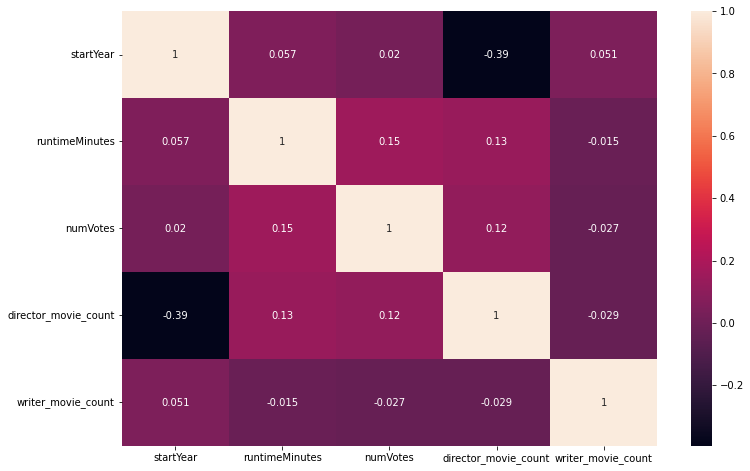

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
#sns.heatmap(df_train.corr(), annot=True)
sns.heatmap(x.corr(), annot=True)

#sns.pairplot(data, hue='Clicked on Ad')


<AxesSubplot:xlabel='startYear'>

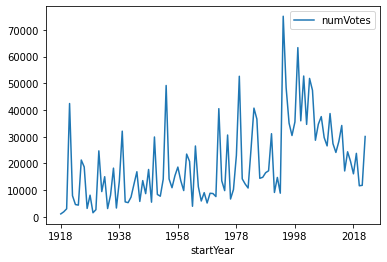

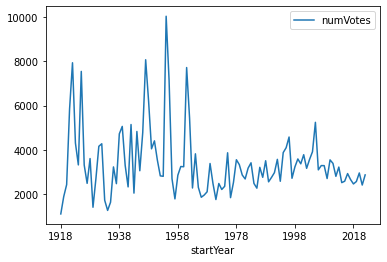

In [100]:
# Numvotes over time, very spikey, mean != median AT ALL
df_train['numVotes'].replace('\\N', -1, inplace=True)
df_train['numVotes'].replace('', -1, inplace=True)
df_train['numVotes'].replace('NULL', -1, inplace=True)
df_train.loc[df_train['numVotes'].isna(), 'numVotes'] = -1

df_train[['startYear', 'numVotes']].groupby('startYear').mean().plot()
df_train[['startYear', 'numVotes']].groupby('startYear').median().plot()

<AxesSubplot:xlabel='startYear'>

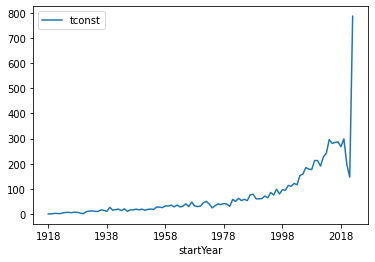

In [98]:
# Voted movies over time, very few old ones
df_train[['startYear','tconst']].groupby('startYear').count().plot()